<table>
    <tr><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/Naive_Bayes_CountVectorizer.ipynb">
         <img alt="start" src="figures/button_previous.jpg" width= 70% height= 70%>
    </td><td>
        <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/Index.ipynb">
         <img alt="start" src="figures/button_table-of-contents.jpg" width= 70% height= 70%>
    </td><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/SVM_HashingVectorizer-PorterStemming.ipynb">
         <img alt="start" src="figures/button_next.jpg" width= 70% height= 70%>
    </td></tr>
</table>

## Naive Bayes and Support vector machines using binary hashing vectorizer
Same vectorizer of the previous notebook with the difference that the binary parameter is activated. The binary hashing vectorizer is explained in the Vectorization notebook.

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from collections import Counter

#[1] Importing dataset

dataset = pd.read_json(r"C:\Users\Panos\Desktop\Dissert\Code\Video_Games_5.json", lines=True, encoding='latin-1')
dataset = dataset[['reviewText','overall']]

#[2] Reduce number of classes

ratings = []
for index,entry in enumerate(dataset['overall']):
    if entry == 1.0 or entry == 2.0:
        ratings.append(-1)
    elif entry == 3.0:
        ratings.append(0)
    elif entry == 4.0 or entry == 5.0:
        ratings.append(1)

In [2]:
#[3] Cleaning the text

import re
import nltk
from nltk.corpus import stopwords

corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['reviewText'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [3]:
#[4] Prepare Train and Test Data sets
            
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus,ratings,test_size=0.3)

print(Counter(Train_Y).values()) # counts the elements' frequency

dict_values([122305, 20030, 19911])


In [4]:
#[5] Encoding

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [5]:
#[6] Word Vectorization
        
Hashing_vect = HashingVectorizer(binary=True, alternate_sign=False)
Hashing_vect.fit(corpus)
Train_X_Hashing = Hashing_vect.transform(Train_X)
Test_X_Hashing = Hashing_vect.transform(Test_X)

In [6]:
#[7] Use the Naive Bayes Algorithms to Predict the outcome

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Hashing,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Hashing)

# Use accuracy_score function to get the accuracy
print("-----------------------Naive Bayes------------------------\n")
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y, predictions_NB)
print("\n",cm,"\n")
# Printing a classification report of different metrics
from sklearn.metrics import classification_report
my_tags = ['Positive','Neutral','Negative']
print(classification_report(Test_Y, predictions_NB,target_names=my_tags))

# Export reports to files for later visualizations
report_NB = classification_report(Test_Y, predictions_NB,target_names=my_tags, output_dict=True)
report_NB_df = pd.DataFrame(report_NB).transpose()
report_NB_df.to_csv(r'NB_report_HashingVect_Binary.csv', index = True, float_format="%.3f")

-----------------------Naive Bayes------------------------

Naive Bayes Accuracy Score ->  75.76725055368597

 [[    0     0  8486]
 [    0     0  8364]
 [    0     0 52684]] 

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      8486
     Neutral       0.00      0.00      0.00      8364
    Negative       0.76      1.00      0.86     52684

    accuracy                           0.76     69534
   macro avg       0.25      0.33      0.29     69534
weighted avg       0.57      0.76      0.65     69534



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#[8] Use the Support Vector Machine Algorithms to Predict the outcome

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Hashing,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Hashing)

# Use accuracy_score function to get the accuracy
print("-----------------Support Vector Machine CM------------------\n")
print("Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
cm = confusion_matrix(Test_Y, predictions_SVM)
# Making the confusion matrix
print("\n",cm,"\n")
# Printing a classification report of different metrics
print(classification_report(Test_Y, predictions_SVM,target_names=my_tags))

# Export reports to files for later visualizations
report_SVM = classification_report(Test_Y, predictions_SVM,target_names=my_tags, output_dict=True)
report_SVM_df = pd.DataFrame(report_SVM).transpose()
report_SVM_df.to_csv(r'SVM_report_HashingVect_Binary.csv', index = True, float_format="%.3f")

-----------------Support Vector Machine CM------------------

Accuracy Score ->  82.69479679005954

 [[ 4969   638  2879]
 [ 1341  1247  5776]
 [  878   521 51285]] 

              precision    recall  f1-score   support

    Positive       0.69      0.59      0.63      8486
     Neutral       0.52      0.15      0.23      8364
    Negative       0.86      0.97      0.91     52684

    accuracy                           0.83     69534
   macro avg       0.69      0.57      0.59     69534
weighted avg       0.79      0.83      0.80     69534



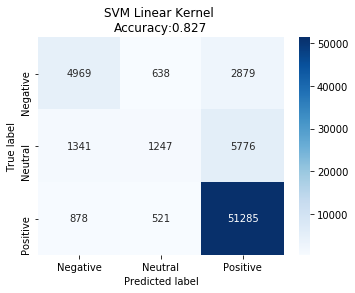

In [9]:
# [9] Plot the confusion matrix - Support Vector Machines

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])

plt.figure(figsize=(5.5,4))
ax = sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(Test_Y, predictions_SVM)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/SVM_HashingVectorizer-PorterStemming.ipynb">
         <img alt="start" src="figures/button_next.jpg">